# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

In [2]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


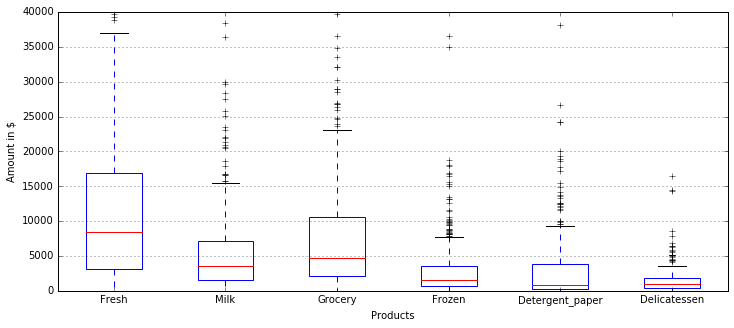

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

# rectangular box plot
bplot1 = axes.boxplot(data.values,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

axes.yaxis.grid(True)
axes.set_xlabel('Products')
axes.set_ylabel('Amount in $')

plt.setp(axes, xticks=[y+1 for y in range(len(data.columns))],
         xticklabels=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent_paper','Delicatessen'])

plt.ylim(0,40000);


PCA will use the features with more variance to build the first components. Given the 3rd line table above (std), We could expect that Fresh, Grocery and Milk will be highly important in the couple of first components.

ICA will build independant components, to do so it needs features that best separate different types of customers according to their purchasing habits.

To build our first ICA component we need 2 categories bought by different customers. Below I computed the ratio median / mean the lower the ratio the more it will be easy to isolate customer who buy this product.

Both Detergent_paper and Frozen have the lowest ratio.

Hence, we will have more chance when Combining both of them to clearly separate 2 groups with different purchasing behaviors (those who buy more Detergents_Paper and less Frozen Vs those who buy more Frozen and less Detergents_Paper).

In [7]:
for col in data.columns:
    print "for {0}: median / mean = {1:.2f}%".format(col, np.median(data[col]) * 100 / np.mean(data[col]))

for Fresh: median / mean = 70.86%
for Milk: median / mean = 62.57%
for Grocery: median / mean = 59.81%
for Frozen: median / mean = 49.68%
for Detergents_Paper: median / mean = 28.34%
for Delicatessen: median / mean = 63.32%


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


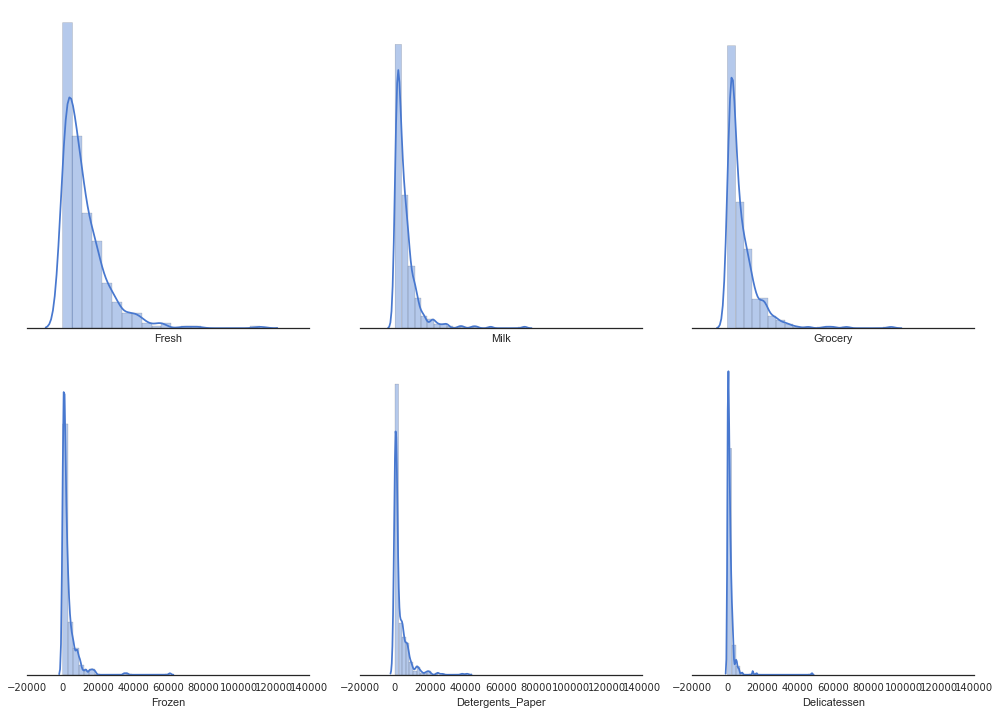

In [4]:
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(14, 10), sharex=True)
sns.despine(left=True)


# Plot a simple histogram with binsize determined automatically

for i,col in enumerate(data.columns):
    if i < 3:
        nb = 0
    else:
        nb = 1
    sns.distplot(data[col], color="b", ax=axes[nb, i % 3], bins=20)
#sns.distplot(data["Fresh"], color="b", ax=axes[0, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [5]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

The variance drops from 40% to 7% between the 2nd and the 3rd components. I would choose to keep only 2 dimensions. Since only 2 variables explains 85% of the variance, I can do some as simple as plotting the data points to think about how to group them.

**3)** What do the dimensions seem to represent? How can you use this information?

The first component has 70% of its weight on Fresh items. Buyers tend to differenciate through this items.

In [6]:
print "Fresh items weight (or importance) is {0:.2f}%.".format(np.abs(pca.components_[0][0]) / np.abs(pca.components_[0]).sum()*100)

Fresh items weight (or importance) is 70.42%.


The second component is mostly a mix of Milk and Grocery. We could name this category **"Grocery"**.

In [7]:
print "Milk and Grocery items represent {0:.2f}% of the second component.".format( (np.abs(pca.components_[1][1]) + np.abs(pca.components_[1][2])) / np.abs(pca.components_[1]).sum()*100)

Milk and Grocery items represent 69.88% of the second component.


Now all we are left with conceptuatually are 2 dimensions to rank our clients.

Removing the 4 PCA last dimensions enables us to group our customer in a 2 dimensional space with the added bonus of allowing us to visualize our groups more easily.

###ICA

In [8]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

data_centered = StandardScaler().fit_transform(data)


ica_4 = FastICA(n_components=4, random_state=14).fit(data_centered)
ica_6 = FastICA(n_components=6, random_state = 14).fit(data_centered)

# Print the independent components
print ica_4.components_

[[ 0.00305829  0.01303128  0.01935825  0.00244355  0.02027703 -0.00772317]
 [-0.04966602 -0.00018288 -0.00053902  0.00373094  0.00130949  0.0059979 ]
 [ 0.01090569  0.00235075 -0.00205501 -0.05424726 -0.00325838  0.01487577]
 [ 0.00553067 -0.01144728  0.00434874  0.0042735   0.00989897 -0.04633815]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

In [9]:
def min_weight(vect):
    w = np.min(vect) / vect[vect < 0].sum()
    return w * 100
    
def max_weight(vect):
    w = np.max(vect) / vect[vect > 0].sum()
    return w * 100


for i, v in enumerate(ica_4.components_):
    print "Component number {0}'s max is {2}, its value is {1:.4f}. It accounts for {3:.2f} % of the positives".format(i + 1, np.max(v), data.columns[np.argmax(v,axis=0)], max_weight(v) ) 
    print "Component number {0}'s min is {2} , its value is {1:.4f}. It accounts for {3:.2f} % of the negatives".format(i + 1, np.min(v),data.columns[np.argmin(v,axis=0)], min_weight(v) )
    print " "

Component number 1's max is Detergents_Paper, its value is 0.0203. It accounts for 34.86 % of the positives
Component number 1's min is Delicatessen , its value is -0.0077. It accounts for 100.00 % of the negatives
 
Component number 2's max is Delicatessen, its value is 0.0060. It accounts for 54.34 % of the positives
Component number 2's min is Fresh , its value is -0.0497. It accounts for 98.57 % of the negatives
 
Component number 3's max is Delicatessen, its value is 0.0149. It accounts for 52.88 % of the positives
Component number 3's min is Frozen , its value is -0.0542. It accounts for 91.08 % of the negatives
 
Component number 4's max is Detergents_Paper, its value is 0.0099. It accounts for 41.16 % of the positives
Component number 4's min is Delicatessen , its value is -0.0463. It accounts for 80.19 % of the negatives
 


With the statementents above, separates customers into groups with very distinct purchasing behaviors

- Component 1 : Customers who order Detergents_paper but also Milk and Grocery Vs those who order Delicatessen
- Component 2 : Customers who order Delicatessen Vs those who order Fresh products
- Component 3 : Customers who order Delicatessen Vs those who order Frozen products
- Component 4 : Customers who order Detergents_paper Vs those who order Delicatessen

Component 1 and 4 are close enough. We might want to reduce the number of components to 3 only.

Interestingly the parameters used for a decomposition into 6 components uses different vectors. Again vectors 2 and 3 won't be independant, we would need to reduce the number of components.

ICA gives us an interstering way to explore the data graphically, it gives us insight on the combinaison of parameters that are worth trying first, since they are considered as being as independant as possible.

It comes to my mind that could make a good preprocessing step in case we were using a Naive Bayes Algorithm (I'm just saying this on the basis of intuition).


In [10]:
for i, v in enumerate(ica_6.components_):
    print "Component number {0}'s max is {2}, its value is {1:.4f}. It accounts for {3:.2f} % of the positives".format(i + 1, np.max(v), data.columns[np.argmax(v,axis=0)], max_weight(v) ) 
    print "Component number {0}'s min is {2} , its value is {1:.4f}. It accounts for {3:.2f} % of the negatives".format(i + 1, np.min(v),data.columns[np.argmin(v,axis=0)], min_weight(v) )
    print " "

Component number 1's max is Milk, its value is 0.0723. It accounts for 78.76 % of the positives
Component number 1's min is Grocery , its value is -0.0565. It accounts for 75.26 % of the negatives
 
Component number 2's max is Detergents_Paper, its value is 0.0145. It accounts for 44.67 % of the positives
Component number 2's min is Grocery , its value is -0.0700. It accounts for 94.58 % of the negatives
 
Component number 3's max is Detergents_Paper, its value is 0.1332. It accounts for 83.45 % of the positives
Component number 3's min is Grocery , its value is -0.1084. It accounts for 85.18 % of the negatives
 
Component number 4's max is Delicatessen, its value is 0.0509. It accounts for 95.48 % of the positives
Component number 4's min is Grocery , its value is -0.0056. It accounts for 38.40 % of the negatives
 
Component number 5's max is Frozen, its value is 0.0541. It accounts for 88.05 % of the positives
Component number 5's min is Delicatessen , its value is -0.0168. It accoun

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

[According to scikit learn](http://scikit-learn.org/stable/modules/mixture.html#gmm) : *"One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians."*

Gaussian Mixture Model is a probabilistic wheras K-Means minimizes the distance between the centroids and the data points.

Gaussian Mixture Model allows us to draw much more complicated boundaries between clusters of points which can be very interesing to separate the clusters when lines cannot capture properly what differentiate data points.

K-means none is much simpler to understand and it is sometimes armful to choose unecessary complexity. 

In our case, we want to be able to explain our data as simply as possible, hence choosing the K-Means approach.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [11]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [12]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation


reduced_data = PCA(n_components=2).fit_transform(data)

reduced_data = StandardScaler().fit_transform(reduced_data)

print reduced_data[:10]  # print upto 10 elements

[[-0.05066239  0.13161505]
 [ 0.34502287  0.33556674]
 [ 0.37738285  0.21406486]
 [-0.07718708 -0.5212911 ]
 [-0.83067886 -0.17928035]
 [ 0.2155776  -0.07967954]
 [ 0.05576966 -0.16710073]
 [ 0.34874672  0.11866355]
 [ 0.52313722 -0.18311407]
 [ 0.37595155  1.11903068]]


In [13]:
#clusters = GMM(n_components=3, covariance_type='spherical').fit(reduced_data)
#print clusters

In [14]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
def fit_k_mean(n_clusters):
    clusters = KMeans(n_clusters).fit(reduced_data)
    return clusters

In [15]:
from sklearn import metrics
def compute_sihouette(n_clusters,clusters):
    labels = clusters.labels_
    print "for {0} clusters silhouette score is {1}".format(n_clusters,metrics.silhouette_score(reduced_data, labels, metric='euclidean')) 

In [16]:
def plot_clusters(clusters, reduced_data):
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

    centroids = clusters.cluster_centers_


    # Put the result into a color plot

    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [17]:
def run_k_means(n_clusters):
    clusters = fit_k_mean(n_clusters)
    compute_sihouette(n_clusters, clusters)
    plot_clusters(clusters,reduced_data)

for 2 clusters silhouette score is 0.533707466358


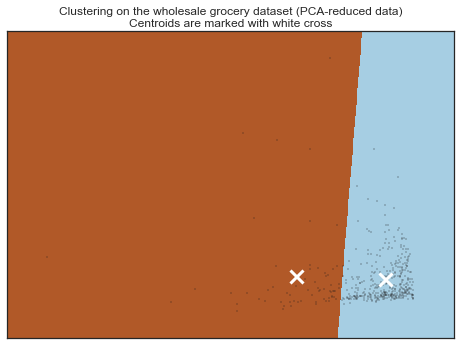

for 3 clusters silhouette score is 0.523070794792


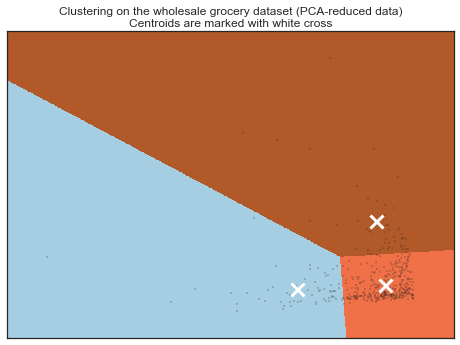

for 4 clusters silhouette score is 0.470192829698


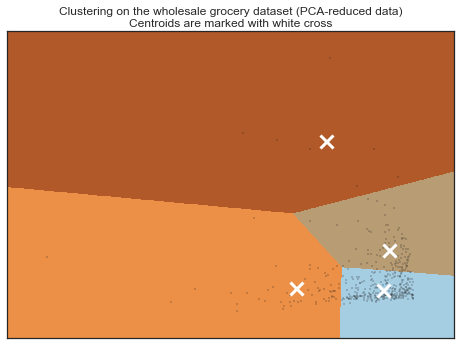

In [18]:
for i in range(2,5,1):
    run_k_means(n_clusters=i)

I selected 3 clusters with 2 clusters only we cannot account for customers who who order a lot of Grocery and Milk.

With 4 clusters or more we are left with categories with very few points.

**7)** What are the central objects in each cluster? Describe them as customers.

The central objects are the centroids. 
They represent the average location of the points located in their cluster.

The left cluster is made of **premium customers who order a lot more fresh products**.

the top cluster is made of **premium customers who order Grocery (and Milk)**

The right bottom dense cluster order comparatively low quantities of those.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

The variance in the data being quite important, PCA resulted in being powerful approach to be able to limit the number of dimensions used.

KMeans came as a nice complement to draw a line between clusters and effectitvely deciding on our segments.

**9)** How would you use that technique to help the company design new experiments?

Instead of conducting the change in delivery method across the whole population of customer, the change could be tested taking into account our 3 customers segments.

We would randomly split each customer segment in 2 folds : a control group and a test group.

2 weeks after the change, we would measure customer statisfaction via a survey.

Comparing our control and test groups we would be in a position to implement the change only for some customer segment(s).

**10)** How would you use that data to help you predict future customer needs?

If we consider customers' spendings as features and the clusters defined as labels.
We then can train a model on this data (keeping away a test set to verify our model accuracy).

Now when a new customer shows up, the model can assign it to a cluster. And we can predict its future orderings as being the average or the median of the orderings made by customers in the predicted cluster.